In [25]:
#### IMPORT LIBRARIES #####
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np

from datetime import datetime

In [18]:
#### Get Correct City #####
location = "Toronto" # "Toronto", "Timmins", "Windsor"

In [19]:
#### COMBINE WEATHER DATA #####
# List of Weather Excel files to be merged
file_list = ""
             
if location == "Toronto":
    file_list = ['Toronto - ninja_weather_43.6535_-79.3839 - 2019.xlsx',
                 'Toronto - ninja_weather_43.6535_-79.3839 - 2020.xlsx']
else:
    print("Wrong City")

    
# Create an empty list to store the DataFrames
dataframes = []

# Iterate through the list of files
for file in file_list:
    data = pd.read_excel(file)
    dataframes.append(data)

# Concatenate the DataFrames into a single DataFrame
merged_data = pd.concat(dataframes, ignore_index=True)

# Save the merged data to a new Excel file
merged_file = f'Weather - {location} - Ninja - Data - 2019 2020.xlsx'  # Replace with your desired file name
merged_data.to_excel(merged_file, index=False)

In [20]:
#### UPDATE WEATHER DATA #####
file_weather = f'Weather - {location} - Ninja - Data - 2019 2020.xlsx'
data = pd.read_excel(file_weather)   
data = pd.get_dummies(data, columns=['Holiday', 'Week Day'], drop_first=False)


df = pd.DataFrame(data)
column_name = 'Holiday.1'
if column_name in df.columns:
    data = data.drop(['Holiday.1'], axis=1)
column_name = 'Weekday'    
if column_name in df.columns:
    data = data.drop(['Weekday'], axis=1)

    
# Change FALSE to 0 and TRUE to 1
# Holiday_Holiday
# Holiday_Working
# Week Day_Friday
# Week Day_Monday
# Week Day_Saturday
# Week Day_Sunday
# Week Day_Thursday
# Week Day_Tuesday
# Week Day_Wednesday
data['Holiday_Holiday'] = data['Holiday_Holiday'].astype(int)
data['Holiday_Working'] = data['Holiday_Working'].astype(int)
data['Week Day_Friday'] = data['Week Day_Friday'].astype(int)
data['Week Day_Monday'] = data['Week Day_Monday'].astype(int)
data['Week Day_Saturday'] = data['Week Day_Saturday'].astype(int)
data['Week Day_Sunday'] = data['Week Day_Sunday'].astype(int)
data['Week Day_Thursday'] = data['Week Day_Thursday'].astype(int)
data['Week Day_Tuesday'] = data['Week Day_Tuesday'].astype(int)
data['Week Day_Wednesday'] = data['Week Day_Wednesday'].astype(int)

# Save the merged data to a new Excel file
merged_file = f'Weather - {location} - Ninja - Data - 2019 2020.xlsx'
data.to_excel(merged_file, index=False)

In [21]:
#### COMBINE ENERGY DATA #####
# List of Excel files to be merged
file_list = ""

if location == "Toronto":
    file_list = ['Toronto - IESO - DemandZonal - 2019.xlsx',
                 'Toronto - IESO - DemandZonal - 2020.xlsx']
else:
    print("Wrong City")            

# Create an empty list to store the DataFrames
dataframes = []

# Iterate through the list of files
for file in file_list:
    # Read each file into a DataFrame
    data = pd.read_excel(file)
    
    # Append the DataFrame to the list
    dataframes.append(data)

# Concatenate the DataFrames into a single DataFrame
merged_data = pd.concat(dataframes, ignore_index=True)

# Save the merged data to a new Excel file
merged_file = f'Energy - {location} - IESO - Data - 2019 2020.xlsx'
merged_data.to_excel(merged_file, index=False)

In [22]:
#### COMBINE ENERGY WITH WEATHER DATA #####
# Load the Energy File
file1 = f'Weather - {location} - Ninja - Data - 2019 2020.xlsx'
df1 = pd.read_excel(file1)

# Load the second Excel file
file2 = f'Energy - {location} - IESO - Data - 2019 2020.xlsx'
df2 = pd.read_excel(file2)

# Merge the two DataFrames based on the year, month, day, and hour columns
merged_df = pd.merge(df1, df2, on=['Year', 'Month', 'Day', 'Hour'], how='inner')

# Save the merged DataFrame to a new Excel file
merged_file = f'{location} - Energy + Weather - 2019 2020.xlsx'
merged_df.to_excel(merged_file, index=False)

columns = merged_df.columns.tolist()
print(columns)

# 1.... 'Year'
# 2.... 'Month'
# 3.... 'Day'
# 4.... 'Hour'
# 5.... 'Air temperature'
# 6.... 'Precipitation'
# 7.... 'Snowfall'
# 8.... 'Snow mass'
# 9... 'Air density'
# 10... 'Ground-level solar irradiance'
# 11... 'Top of atmosphere solar irradiance'
# 12... 'Cloud cover fraction'
# 13... 'Holiday_Holiday'
# 14... 'Holiday_Working'
# 15... 'Week Day_Friday'
# 16... 'Week Day_Monday'
# 17... 'Week Day_Saturday'
# 18... 'Week Day_Sunday'
# 19... 'Week Day_Thursday'
# 20... 'Week Day_Tuesday'
# 21... 'Week Day_Wednesday'
# 22... 'Energy'

['Year', 'Month', 'Day', 'Hour', 'Air temperature', 'Precipitation', 'Snowfall', 'Snow mass', 'Air density', 'Ground-level solar irradiance', 'Top of atmosphere solar irradiance', 'Cloud cover fraction', 'Holiday_Holiday', 'Holiday_Working', 'Week Day_Friday', 'Week Day_Monday', 'Week Day_Saturday', 'Week Day_Sunday', 'Week Day_Thursday', 'Week Day_Tuesday', 'Week Day_Wednesday', 'Energy']


Elapsed Time:  0:00:00.032918
Top of atmosphere solar irradiance    0.483509
Ground-level solar irradiance         0.445846
Hour                                  0.442831
Week Day_Sunday                       0.172877
Snow mass                             0.160746
Air temperature                       0.158721
Week Day_Saturday                     0.124194
Holiday_Holiday                       0.096713
Holiday_Working                       0.096713
Air density                           0.095233
Week Day_Wednesday                    0.080678
Week Day_Thursday                     0.070141
Week Day_Tuesday                      0.068170
Month                                 0.061552
Snowfall                              0.049827
Year                                  0.044243
Week Day_Friday                       0.043900
Week Day_Monday                       0.033307
Precipitation                         0.028876
Day                                   0.022281
Cloud cover fraction          

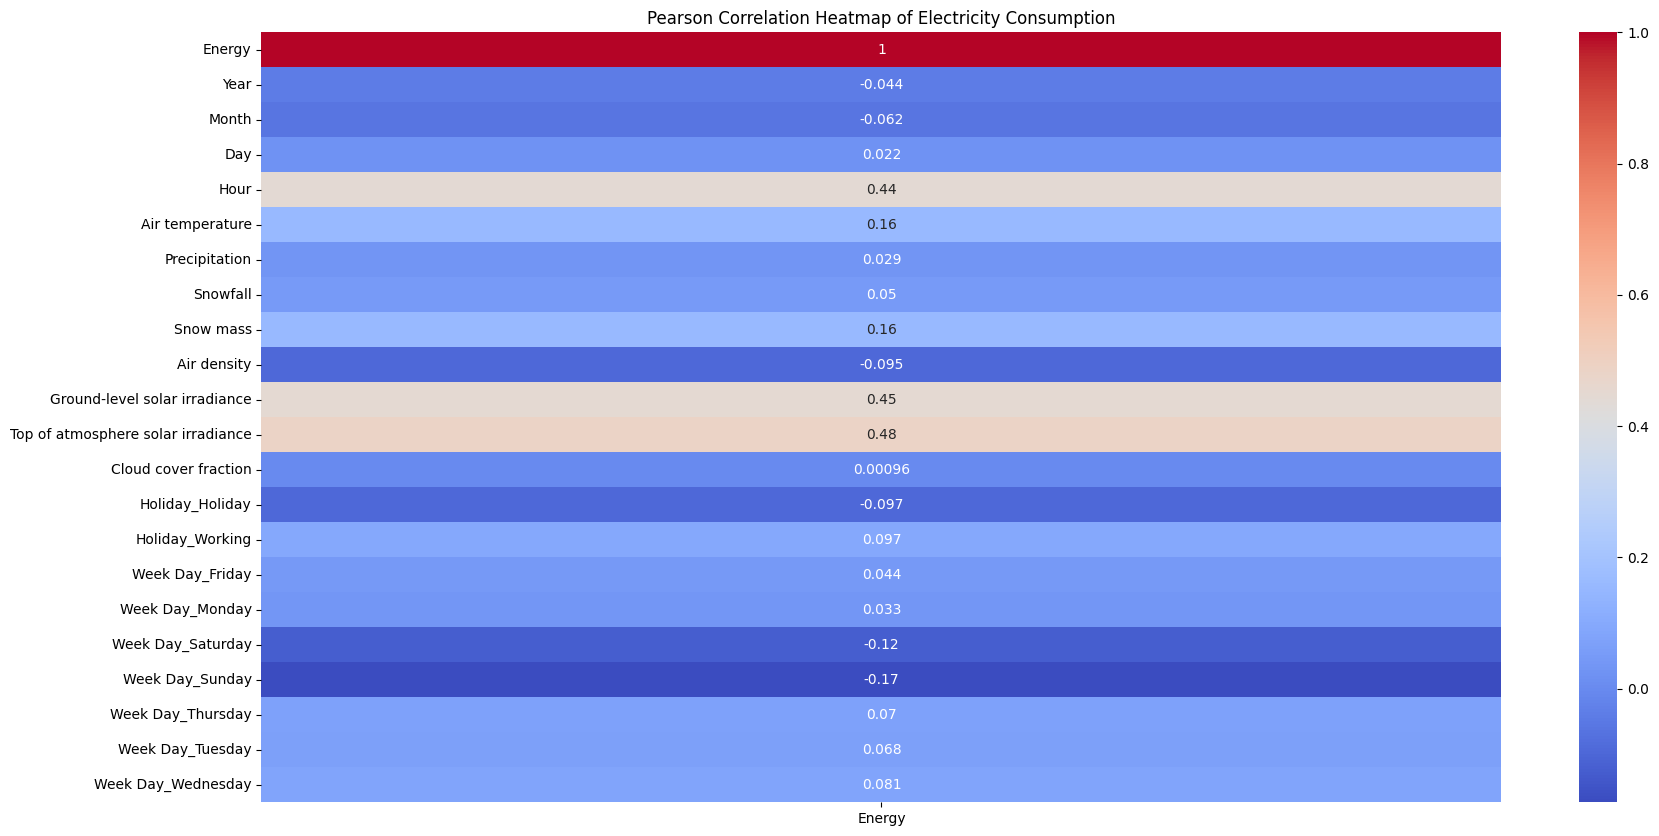

In [37]:
#### CORRELATIONS - Pearson ####
file_name_all = f'{location} - Energy + Weather - 2019 2020.xlsx'
data = pd.read_excel(file_name_all)

col = data.pop('Energy')
data.insert(0, 'Energy', col)

### Pearson Correlation ###
# Calculate the correlation matrix
start_time = datetime.now()
correlation_matrix = data.corr()
electricity_consumption_correlations = correlation_matrix['Energy']
end_time = datetime.now()

elapsed_time = end_time - start_time

# Display the correlations
print("Elapsed Time: ", elapsed_time)

top_correlations = electricity_consumption_correlations.abs().sort_values(ascending=False)[1:22]
print(top_correlations)

electricity_consumption_correlations = correlation_matrix[['Energy']]
#electricity_consumption_correlations = electricity_consumption_correlations.sort_values(by='Energy', ascending=False)
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
sns.heatmap(electricity_consumption_correlations, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap of Electricity Consumption')
plt.show()

##### TORONTO CORRELATIONS #####
# Toronto - Pearson Correlation - 2019 2020.xlsx
# Top of atmosphere solar irradiance    0.483509 ....1
# Ground-level solar irradiance         0.445846 ....2
# Hour                                  0.442831 ....3
# Week Day_Sunday                       0.172877 ....4
# Snow mass                             0.160746 ....5
# Air temperature                       0.158721 ....6
# Week Day_Saturday                     0.124194 ....7
# Holiday_Holiday                       0.096713 ....8
# Holiday_Working                       0.096713 ....9
# Air density                           0.095233 ...10
# Name: Energy, dtype: float64
